In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## **Uppgift: #0**

---

We want to simulate data $(x,y)$ to represent cost for phone subscriptions, with: 

- $x$ - called minutes per month
- $y$ - SEK per month 

&nbsp; a) Use ```numpy.random.normal()``` to simulate a dataset with the following requirements:(*)
- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. $X \sim \mathcal{N}(100, 100)$ 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. $\epsilon \sim \mathcal{N(0, 50)}$ 
- Let $y = 2x+25+\epsilon$
- plot the data set 

&nbsp; b) Now we want to remove some outliers according to this assumption: (*)
- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters $\beta_0 = 25, \beta_1 = 2$

&nbsp; c) Insert the values into a DataFrame (*)

---

**a)**

<AxesSubplot: xlabel='called minutes per month', ylabel='SEK per month'>

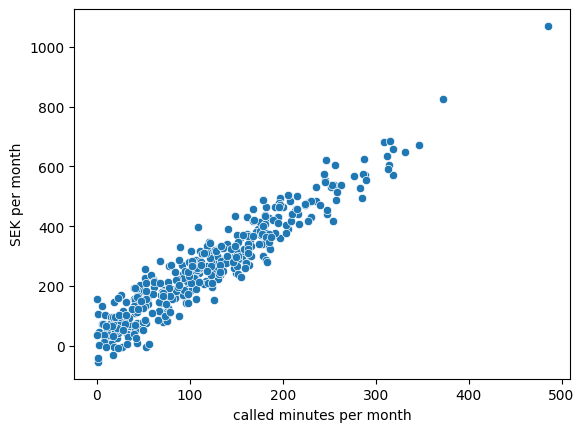

In [28]:
np.random.seed(42)

x = np.abs(np.random.normal(loc=100, scale=100, size=400))
noise = np.random.normal(loc= 0, scale=50, size= 400)

y_data = lambda x, noise: (2*x) + 25 + noise
y = y_data(x=x, noise=noise)


data = {"called minutes per month": x,
        "SEK per month": y}

df = pd.DataFrame(data= data)

sns.scatterplot(data= df, x="called minutes per month", y="SEK per month")

**b) and c)**

In [40]:
df_over_300 = df[df["called minutes per month"] > 300].index
df.drop(df_over_300, inplace=True)

df_negativ = df[df["SEK per month"] < 0].index
df.drop(df_negativ, inplace=True)

df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 399
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   called minutes per month  381 non-null    float64
 1   SEK per month             381 non-null    float64
dtypes: float64(2)
memory usage: 8.9 KB


<AxesSubplot: xlabel='called minutes per month', ylabel='SEK per month'>

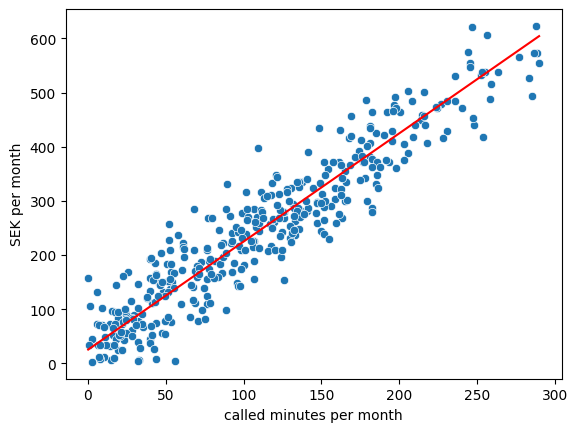

In [43]:
y_hat = lambda x: 25 + 2*x

x = df["called minutes per month"]

sns.scatterplot(data=df, x="called minutes per month", y="SEK per month")
sns.lineplot(x= x, y= y_hat(x), color= "red")

## **Uppgift #1**

---

Before moving on with linear regression we shall first perform a train-test-split. 

&nbsp; a) Create a train-test-split function with the following call signature: (*)

```py
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
```

that returns the tuple:
```
(X_train, X_test, y_train, y_test)
```

&nbsp; b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. (*)

---